<a href="https://colab.research.google.com/github/VasileiosGiannopoulos/SVHN-image-classifier/blob/master/Capstone_Project_SVHN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [ ]:
import tensorflow
from scipy.io import loadmat

import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Load the dataset from your Drive folder

train = loadmat('/content/gdrive/My Drive/Capstone/train_32x32.mat')
test = loadmat('/content/gdrive/My Drive/Capstone/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
# Pre-process the images and labels
x_train = train['X']/255.0
x_train = np.moveaxis(x_train, -1, 0)

y_train = train['y']
y_train = y_train % 10

x_test = test['X']/255.0
x_test = np.moveaxis(x_test, -1, 0)

y_test = test['y']
y_test = y_test % 10


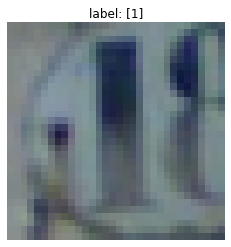

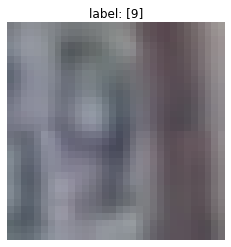

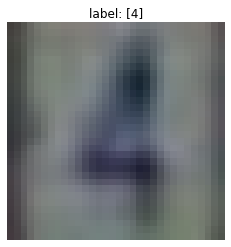

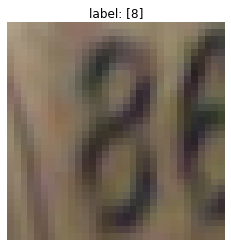

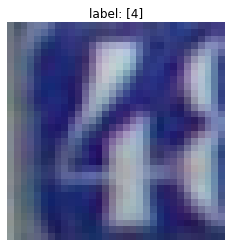

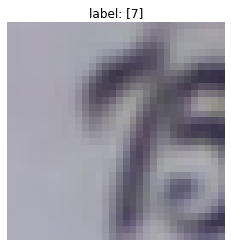

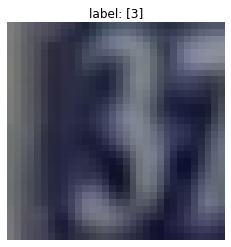

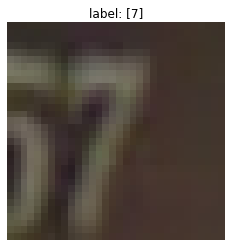

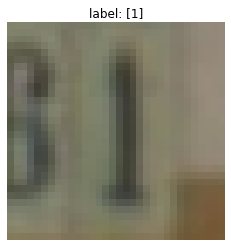

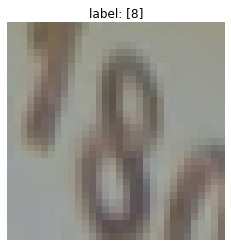

In [ ]:
# Figure of 10 random images from the dataset
pairs = list(zip(x_train, y_train))
pairs = random.sample(pairs, 10)
random_rgb_images, random_rgb_labels = zip(*pairs)

for i in range(10):
  plt.axis('off')
  ax[i] = plt.imshow(random_rgb_images[i], aspect='equal')
  ax[i] = plt.title(f'label: {random_rgb_labels[i]}')
  plt.show()

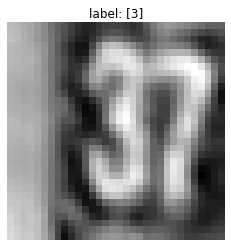

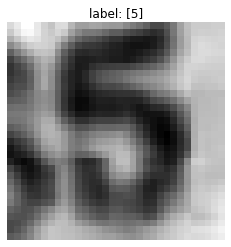

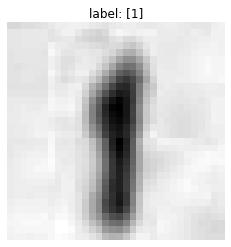

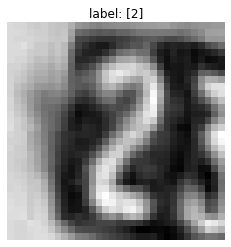

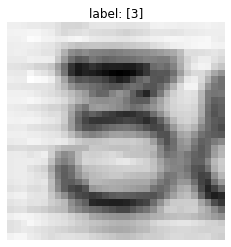

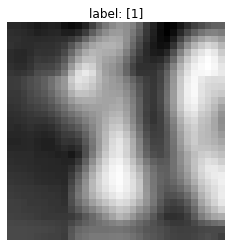

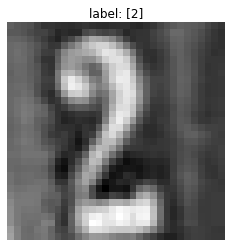

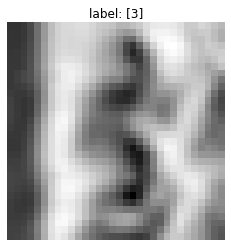

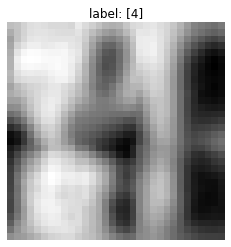

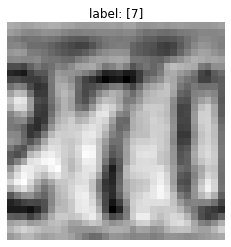

In [ ]:
# Turn to greyscale and show 10 random images

x_train_grey = np.dot(x_train, [0.2989, 0.5870, 0.1140])
x_test_grey = np.dot(x_test, [0.2989, 0.5870, 0.1140])

grey_pairs = list(zip(x_train_grey, y_train))
grey_pairs = random.sample(grey_pairs, 10)
random_grey_images, random_grey_labels = zip(*grey_pairs)

for i in range(10):
  plt.axis('off')
  plt.imshow(random_grey_images[i], aspect='equal', cmap='gray')
  plt.title(f'label: {random_grey_labels[i]}')
  plt.show()

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
# Build of the MLP model. The Batch Normalization layer gives much better results.

model = Sequential([
                    Flatten(input_shape=(32,32)),
                    BatchNormalization(),
                    Dense(256, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 308,298
Trainable params: 306,250
Non-trainable params: 2,048
______________________________________________

In [ ]:
# Custom callbacks. We save the best weights for each model and use Early Stopping to avoid unnecessary runs.

best_loss_callback = ModelCheckpoint('loss_checkpoints/',
                                save_weights_only=True,
                                monitor='loss',
                                save_freq='epoch',
                                mode='min',
                                save_best_only=True)

cnn_best_loss_callback = ModelCheckpoint('cnn_loss_checkpoints/',
                                save_weights_only=True,
                                monitor='loss',
                                save_freq='epoch',
                                mode='min',
                                save_best_only=True)

early_stop_callback = EarlyStopping(monitor='loss', patience=4, mode='min', min_delta=0.01)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_grey, y_train, epochs=20, batch_size=1500, validation_split=0.15, callbacks=[best_loss_callback, early_stop_callback])

Epoch 1/20
42/42 [==============================] - 3s 77ms/step - loss: 1.9443 - accuracy: 0.3326 - val_loss: 2.0407 - val_accuracy: 0.4329
Epoch 2/20
42/42 [==============================] - 3s 73ms/step - loss: 1.1882 - accuracy: 0.6331 - val_loss: 1.6141 - val_accuracy: 0.6253
Epoch 3/20
42/42 [==============================] - 3s 74ms/step - loss: 0.9318 - accuracy: 0.7169 - val_loss: 1.3285 - val_accuracy: 0.6964
Epoch 4/20
42/42 [==============================] - 3s 74ms/step - loss: 0.8078 - accuracy: 0.7548 - val_loss: 1.0880 - val_accuracy: 0.7400
Epoch 5/20
42/42 [==============================] - 3s 74ms/step - loss: 0.7167 - accuracy: 0.7849 - val_loss: 0.9414 - val_accuracy: 0.7544
Epoch 6/20
42/42 [==============================] - 3s 73ms/step - loss: 0.6549 - accuracy: 0.8042 - val_loss: 0.8076 - val_accuracy: 0.7821
Epoch 7/20
42/42 [==============================] - 3s 74ms/step - loss: 0.6151 - accuracy: 0.8168 - val_loss: 0.7345 - val_accuracy: 0.7913
Epoch 8/20
42

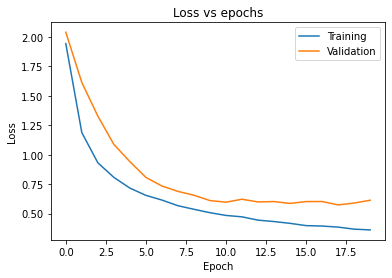

In [ ]:
# Plot: Loss vs Epochs

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

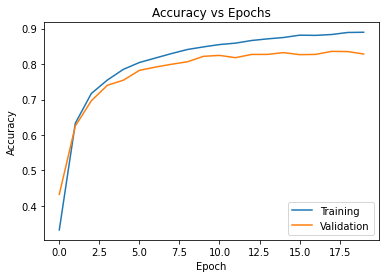

In [ ]:
# Plot: Accuracy vs Epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [ ]:
# Model evaluation on test data

test_loss, test_accuracy = model.evaluate(x_test_grey, y_test, verbose=0)
print(f'MLP test Loss: {test_loss:0.3f} \nMLP test Accuracy: {test_accuracy:0.3f}')

MLP test Loss: 0.759 
MLP test Accuracy: 0.809


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
# Build of the CNN model.

cnn_model = Sequential([
                        Reshape(target_shape=(32,32,1), input_shape=(32,32)),
                        Conv2D(32, kernel_size=(5,5), padding='same', activation='relu', kernel_regularizer=l2(0.001)),
                        Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(0.001)),
                        MaxPooling2D(pool_size=(5,5)),
                        Flatten(),
                        BatchNormalization(),
                        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
                        Dropout(0.3),
                        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
                        Dense(10, activation='softmax')
])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2304)              9216      
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
# MLP model loss and accuracy on the test set.
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(x_train_grey, y_train, validation_split=0.15, epochs=20, batch_size=1024, callbacks=[cnn_best_loss_callback, early_stop_callback])

Epoch 1/20
61/61 [==============================] - 217s 4s/step - loss: 1.7065 - accuracy: 0.4906 - val_loss: 2.3038 - val_accuracy: 0.2713
Epoch 2/20
61/61 [==============================] - 217s 4s/step - loss: 0.8429 - accuracy: 0.7977 - val_loss: 2.1613 - val_accuracy: 0.3170
Epoch 3/20
61/61 [==============================] - 217s 4s/step - loss: 0.7035 - accuracy: 0.8400 - val_loss: 2.0164 - val_accuracy: 0.3524
Epoch 4/20
61/61 [==============================] - 216s 4s/step - loss: 0.6256 - accuracy: 0.8612 - val_loss: 1.8322 - val_accuracy: 0.4718
Epoch 5/20
61/61 [==============================] - 217s 4s/step - loss: 0.5754 - accuracy: 0.8741 - val_loss: 1.5528 - val_accuracy: 0.6323
Epoch 6/20
61/61 [==============================] - 216s 4s/step - loss: 0.5429 - accuracy: 0.8816 - val_loss: 1.3015 - val_accuracy: 0.7121
Epoch 7/20
61/61 [==============================] - 218s 4s/step - loss: 0.5143 - accuracy: 0.8895 - val_loss: 0.9753 - val_accuracy: 0.8461
Epoch 8/20
61

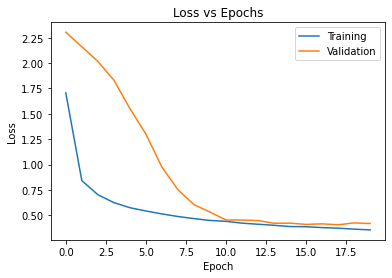

In [ ]:
# Plot: Loss vs Epochs

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

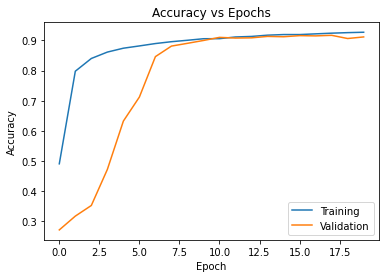

In [ ]:
# Plot: Accuracy vs Epochs

plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [ ]:
# CNN model loss and accuracy on the test set.

cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test_grey, y_test, verbose=0)
print(f'CNN test Loss: {cnn_test_loss:0.3f} \nCNN test Accuracy: {cnn_test_accuracy:0.3f}')

CNN test Loss: 0.451 
CNN test Accuracy: 0.905


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
# Predictions on the test set, using the models we created
model.load_weights('loss_checkpoints/')
cnn_model.load_weights("cnn_loss_checkpoints/")

MLP_predictions = model.predict(x_test_grey)
CNN_predictions = cnn_model.predict(x_test_grey)

In [ ]:
# Create dataframes for the predictions and pair them with the images and their labels

MLP_df=[None for i in range(len(MLP_predictions))]
MLP_max_index=[None for i in range(len(MLP_predictions))]
CNN_df=[None for i in range(len(CNN_predictions))]
CNN_max_index=[None for i in range(len(CNN_predictions))]

for i in range(len(MLP_predictions)):
  MLP_max_index[i] = np.argmax(MLP_predictions[i])
  MLP_df[i] = pd.DataFrame({'prediction':MLP_predictions[i], 'label':['0','1','2','3','4','5','6','7','8','9']})

for i in range(len(CNN_predictions)):
  CNN_max_index[i] = np.argmax(CNN_predictions[i])
  CNN_df[i] = pd.DataFrame({'prediction':CNN_predictions[i], 'label':['0','1','2','3','4','5','6','7','8','9']})

grey_test_pairs = list(zip(x_test_grey, y_test, MLP_df, MLP_max_index, CNN_df, CNN_max_index))
grey_test_pairs = random.sample(grey_test_pairs, 5)
random_grey_test, random_grey_test_labels, random_MLP_df, random_MLP_max_index, random_CNN_df, random_CNN_max_index = zip(*grey_test_pairs)


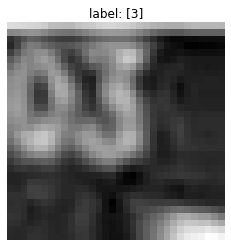

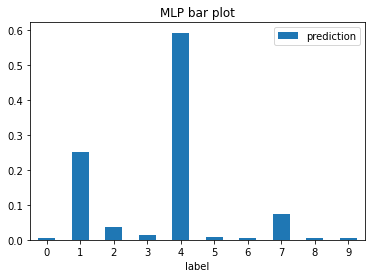

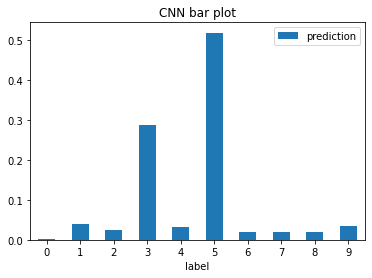

MLP model prediction: 4 with probability 59.14%
CNN model prediction: 5 with probability 51.92%


--------------------------------------------------




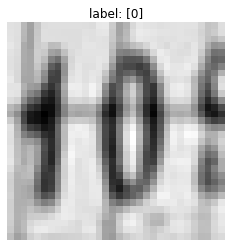

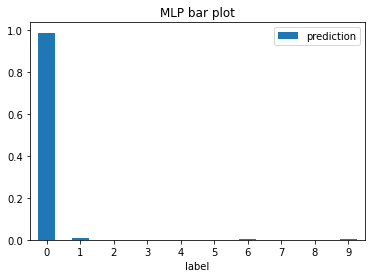

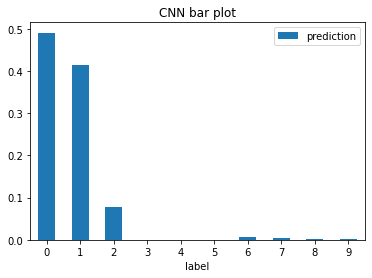

MLP model prediction: 0 with probability 98.56%
CNN model prediction: 0 with probability 49.10%


--------------------------------------------------




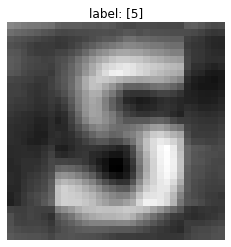

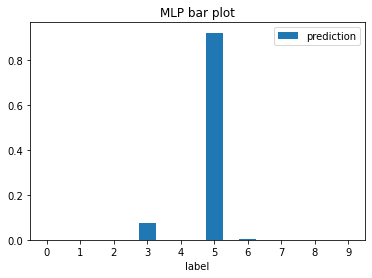

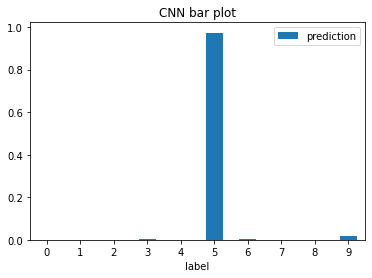

MLP model prediction: 5 with probability 92.03%
CNN model prediction: 5 with probability 97.33%


--------------------------------------------------




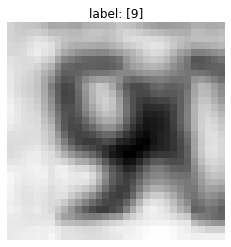

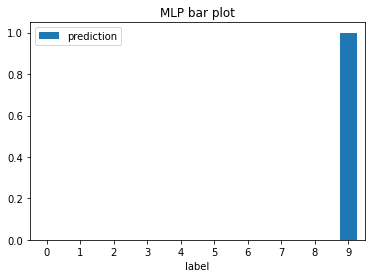

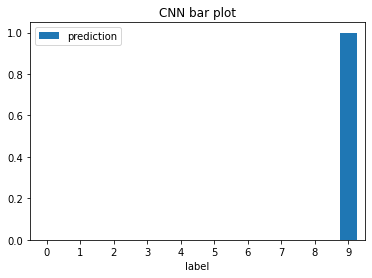

MLP model prediction: 9 with probability 99.96%
CNN model prediction: 9 with probability 99.95%


--------------------------------------------------




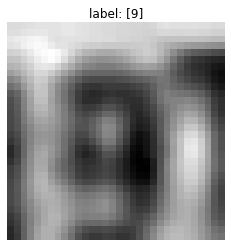

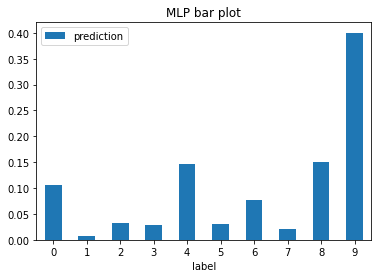

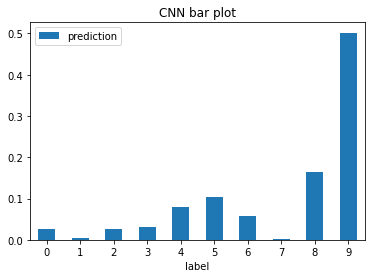

MLP model prediction: 9 with probability 40.02%
CNN model prediction: 9 with probability 50.18%


--------------------------------------------------




In [ ]:
# Create the bar plots and show the final model verdicts
for i in range(5):
  plt.figure()
  plt.axis('off')
  plt.imshow(random_grey_test[i], cmap='gray')
  plt.title(f'label: {random_grey_test_labels[i]}')
  random_MLP_df[i].plot.bar(x='label', y='prediction', rot=0, title='MLP bar plot')
  random_CNN_df[i].plot.bar(x='label', y='prediction', rot=0, title='CNN bar plot')
  plt.show()
  print("MLP model prediction: {} with probability {:.2f}%".format(random_MLP_max_index[i], max(random_MLP_df[i]['prediction'])*100))
  print("CNN model prediction: {} with probability {:.2f}%\n\n".format(random_CNN_max_index[i], max(random_CNN_df[i]['prediction'])*100))
  print('--------------------------------------------------\n\n')